In [7]:
import pandas as pd , numpy as np, matplotlib.pyplot as plt, yfinance as yf

In [14]:
spy = yf.download("SPY",start="1995-01-01",progress=False)
vix = yf.download("^VIX",start="1995-01-01",progress=False)
nifty = yf.download("^NSEI",start="1995-01-01",progress=False)

C:\Users\ramti\AppData\Local\Temp\ipykernel_10116\1748839562.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("SPY",start="1995-01-01",progress=False)
C:\Users\ramti\AppData\Local\Temp\ipykernel_10116\1748839562.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download("^VIX",start="1995-01-01",progress=False)
C:\Users\ramti\AppData\Local\Temp\ipykernel_10116\1748839562.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nifty = yf.download("^NSEI",start="1995-01-01",progress=False)


In [15]:
spy.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1995-01-03,26.662907,26.699307,26.608307,26.617407,324300
1995-01-04,26.790316,26.790316,26.644716,26.781216,351800
1995-01-05,26.790316,26.854015,26.763016,26.808516,89800
1995-01-06,26.817608,26.935907,26.735708,26.844908,448400
1995-01-09,26.844906,26.844906,26.790306,26.808506,36800


In [20]:
Open_, close = spy["Open"], spy["Close"]
overnight =Open_/ close.shift(1) -1
intraday =close / Open_ -1
bh = close.pct_change().fillna(0)

In [27]:
overnight

Ticker,SPY
Date,
1995-01-03,NaN
1995-01-04,0.004437
1995-01-05,0.000679
1995-01-06,0.002038
1995-01-09,-0.000339
...,...
2025-10-20,0.004410
2025-10-21,0.000209
2025-10-22,0.001058


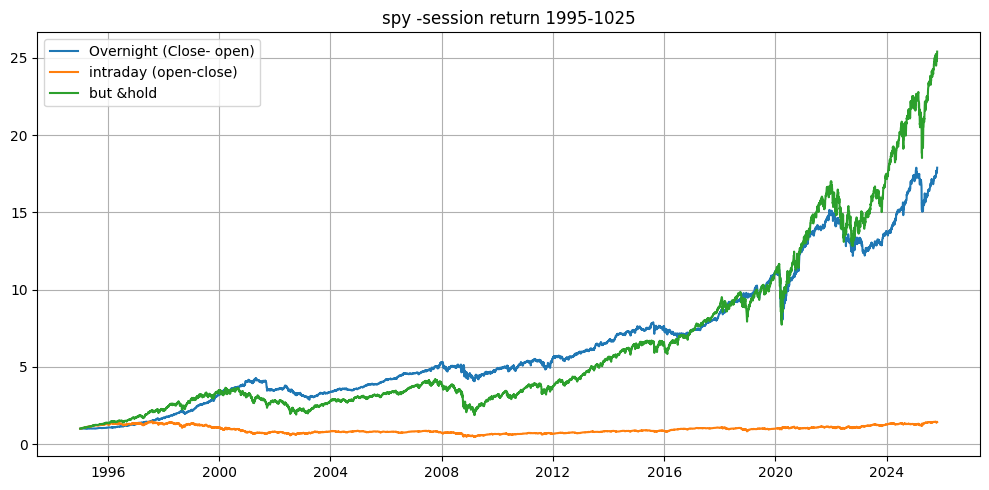

In [28]:
eq_ovn =(1+ overnight).cumprod()
eq_intra= (1+ intraday).cumprod()
eq_bh =(1+bh).cumprod()

plt.figure(figsize=(10,5))
plt.plot(eq_ovn, label="Overnight (Close- open)")
plt.plot(eq_intra, label= "intraday (open-close)")
plt.plot(eq_bh, label="but &hold")
plt. legend();plt.title("spy -session return 1995-1025"); plt.grid(True);plt.tight_layout();plt.show()

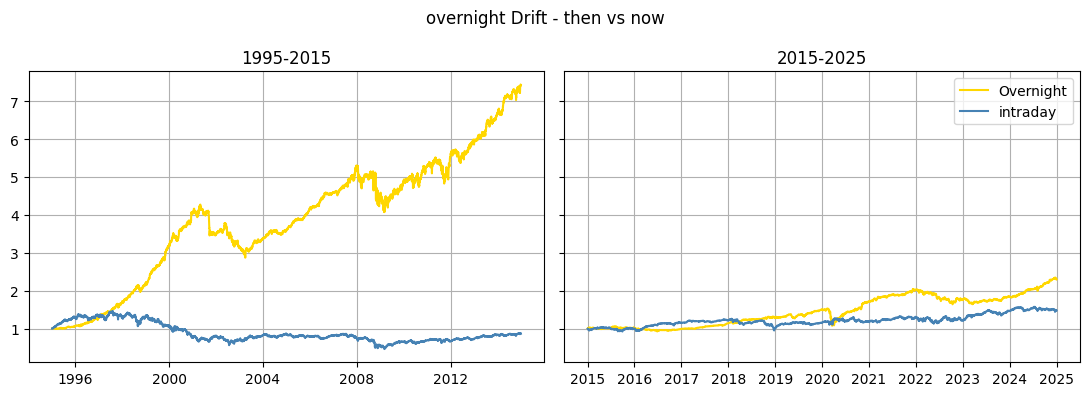

In [33]:
fig, ax =plt.subplots(1,2,figsize=(11,4),sharey=True)


for a ,( start,end,title) in zip(ax,[("1995","2015","1995-2015"),("2015","2025","2015-2025")]):
    m=(overnight.index>=start) &(overnight.index<end)
    a.plot((1+overnight[m]).cumprod(),color="gold",label="Overnight")
    a.plot((1+intraday[m]).cumprod(),color="steelblue",label="intraday")
    a.set_title(title);a.grid(True)
ax[1].legend();plt.suptitle("overnight Drift - then vs now"); plt.tight_layout(); plt.show()

In [34]:
vol =pd.Series({
    "Overnight":overnight.std(ddof=0)*np.sqrt(252),
    "Intraday":intraday.std(ddof=0)*np.sqrt(252)
})

In [35]:
vol

Overnight    Ticker
SPY    0.108898
dtype: float64
Intraday     Ticker
SPY    0.156028
dtype: float64
dtype: object

<Axes: title={'center': 'Overnight Return by VIX Regime'}, xlabel='vix tercile'>

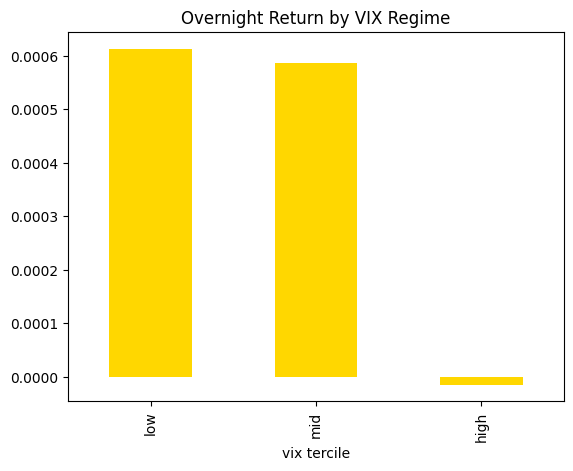

In [46]:
df = pd.DataFrame(index=overnight.index)
df["overnight"] = overnight

# Make sure vix is a Series with matching index
if isinstance(vix, pd.DataFrame):
    df["vix"] = vix["Close"]
else:
    df["vix"] = vix

df = df.dropna()

df["vix tercile"] = pd.qcut(df["vix"], 3, labels=["low", "mid", "high"])

df.groupby("vix tercile", observed=True)["overnight"].mean().plot(
    kind="bar", color="gold", title="Overnight Return by VIX Regime"
)


In [41]:
print(type(vix.squeeze()))
print(df.vix.squeeze().shape)

<class 'pandas.core.frame.DataFrame'>
(7756,)
